In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)


In [2]:
df = pd.read_pickle('../data/new_features.pkl')

In [4]:
df.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,lang,retweeted_status,extended_entities,withheld_in_countries,vader_neg,vader_pos,vader_neu,vader_compound,trump,biden,obama,clinton,bush,friends,status count,followers,creation date,handle,location,acct favs,trailingnumbers
0,2020-09-29 23:59:56+00:00,1311093385688735744,1311093385688735744,Biden a professional debater?? Hardly!! More ...,False,"[0, 71]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,NaN,NaN,None,"{'id': 117904481, 'id_str': '117904481', 'name...",None,None,None,NaN,True,1.311081e+18,1.311081e+18,"{'url': 'https://t.co/cQuxzexXYt', 'expanded':...",{'created_at': 'Tue Sep 29 23:12:13 +0000 2020...,0,0,False,False,0.0,en,NaN,NaN,NaN,0.283,0.157,0.561,-0.4627,False,True,False,False,False,4998,6156,4065,Sat Feb 27 00:36:23 +0000 2010,sfshores53,America,3659,False
1,2020-09-29 23:59:58+00:00,1311093394400333824,1311093394400333824,RT @DarDar458: #PresidentialDebate #Debates202...,False,"[0, 73]","{'hashtags': [{'text': 'PresidentialDebate', '...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 30140760, 'id_str': '30140760', 'name':...",None,None,None,NaN,True,1.311068e+18,1.311068e+18,"{'url': 'https://t.co/GOhLaDJLeN', 'expanded':...",NaN,1,0,False,False,NaN,und,{'created_at': 'Tue Sep 29 23:55:42 +0000 2020...,NaN,NaN,0.000,0.000,1.000,0.0000,False,False,False,False,False,31404,11105,31031,Fri Apr 10 02:47:29 +0000 2009,ProudCdn100,Canada,95405,False
2,2020-09-30 00:00:00+00:00,1311093401652277252,1311093401652277248,How can Biden stand a chance against Trump in ...,False,"[0, 280]","{'hashtags': [{'text': 'VarneyCo', 'indices': ...","<a href=""https://studio.twitter.com"" rel=""nofo...",NaN,NaN,NaN,NaN,None,"{'id': 281610530, 'id_str': '281610530', 'name...",None,None,None,NaN,False,NaN,NaN,NaN,NaN,25,100,False,False,0.0,en,NaN,"{'media': [{'id': 1310969778111217665, 'id_str...",NaN,0.074,0.182,0.744,0.7579,True,True,False,False,False,730,16957,663539,Wed Apr 13 16:27:54 +0000 2011,Varneyco,New York,998,False
3,2020-09-30 00:00:02+00:00,1311093410737070086,1311093410737070080,RT @abbydphillip: Very reminiscent of pre-2018...,False,"[0, 108]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 88223320, 'id_str': '88223320', 'name':...",None,None,None,NaN,True,1.311075e+18,1.311075e+18,"{'url': 'https://t.co/CdP89boyMD', 'expanded':...",NaN,351,0,False,False,NaN,en,{'created_at': 'Tue Sep 29 23:00:28 +0000 2020...,NaN,NaN,0.000,0.000,1.000,0.0000,False,False,False,False,False,1718,20798,21737,Sat Nov 07 16:57:16 +0000 2009,grace_panetta,"New York, NY",91477,False
4,2020-09-30 00:00:04+00:00,1311093419100561408,1311093419100561408,RT @RudyGiuliani: Why was Corrupt Biden’s son ...,False,"[0, 110]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 44295160, 'id_str': '44295160', 'name':...",None,None,None,NaN,False,NaN,NaN,NaN,NaN,15672,0,False,False,NaN,en,{'created_at': 'Tue Sep 29 19:07:59 +0000 2020...,NaN,NaN,0.000,0.000,1.000,0.0000,False,False,False,False,False,2356,12714,893,Wed Jun 03 04:44:06 +0000 2009,susuclarkson,Kentucky/Florida,18823,False


No handles with labels found to put in legend.


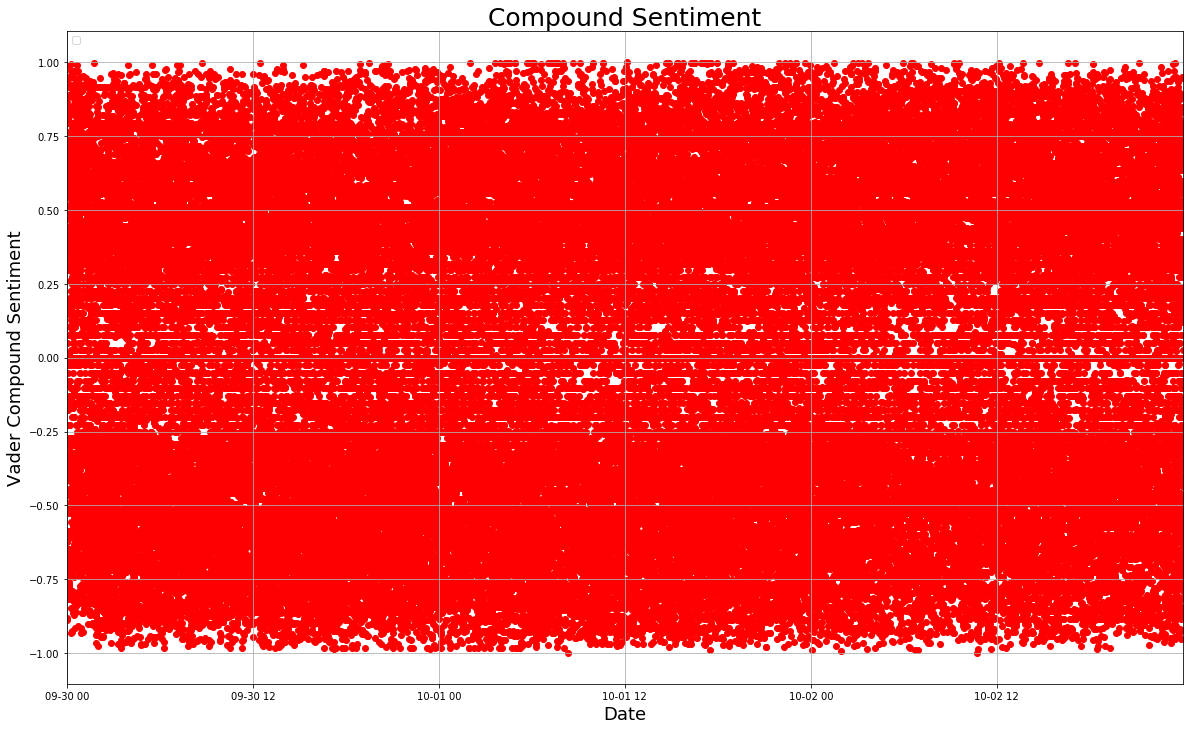

In [7]:
fig, ax = plt.subplots(figsize=(20, 12))
ax.scatter(df.created_at, df.vader_compound, c = 'r')
ax.set_xlim(['2020-09-30 00:00:00+00:00','2020-10-02 23:59:54+0000'])
ax.set_xlabel('Date', fontsize=18)
ax.set_ylabel('Vader Compound Sentiment', fontsize=18)
ax.set_title('Compound Sentiment', fontsize=25)
ax.grid(True)
ax.legend(loc='upper left');

In [9]:
trailers = df[df['trailingnumbers']==True]

In [10]:
nontrailers = df[df['trailingnumbers']==False]

In [23]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [24]:
analyzer = SentimentIntensityAnalyzer()


In [25]:
def analyze_sentiment(text_str):
    vs = analyzer.polarity_scores(text_str)
    return vs

In [13]:
df_tn = pd.read_pickle('../data/trump_neg.pkl')
df_tp = pd.read_pickle('../data/trump_pos.pkl')
df_bn = pd.read_pickle('../data/biden_neg.pkl')
df_bp = pd.read_pickle('../data/biden_pos.pkl')

In [14]:
li = [df_tn, df_tp, df_bn, df_bp]

In [17]:
for i in li:
    print(i.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13059 entries, 36 to 140335
Data columns (total 49 columns):
created_at                   13059 non-null datetime64[ns, UTC]
id                           13059 non-null int64
id_str                       13059 non-null int64
full_text                    13059 non-null object
truncated                    13059 non-null bool
display_text_range           13059 non-null object
entities                     13059 non-null object
source                       13059 non-null object
in_reply_to_status_id        1797 non-null float64
in_reply_to_status_id_str    1797 non-null float64
in_reply_to_user_id          1874 non-null float64
in_reply_to_user_id_str      1874 non-null float64
in_reply_to_screen_name      1874 non-null object
user                         13059 non-null object
geo                          1 non-null object
coordinates                  1 non-null object
place                        55 non-null object
contributors             

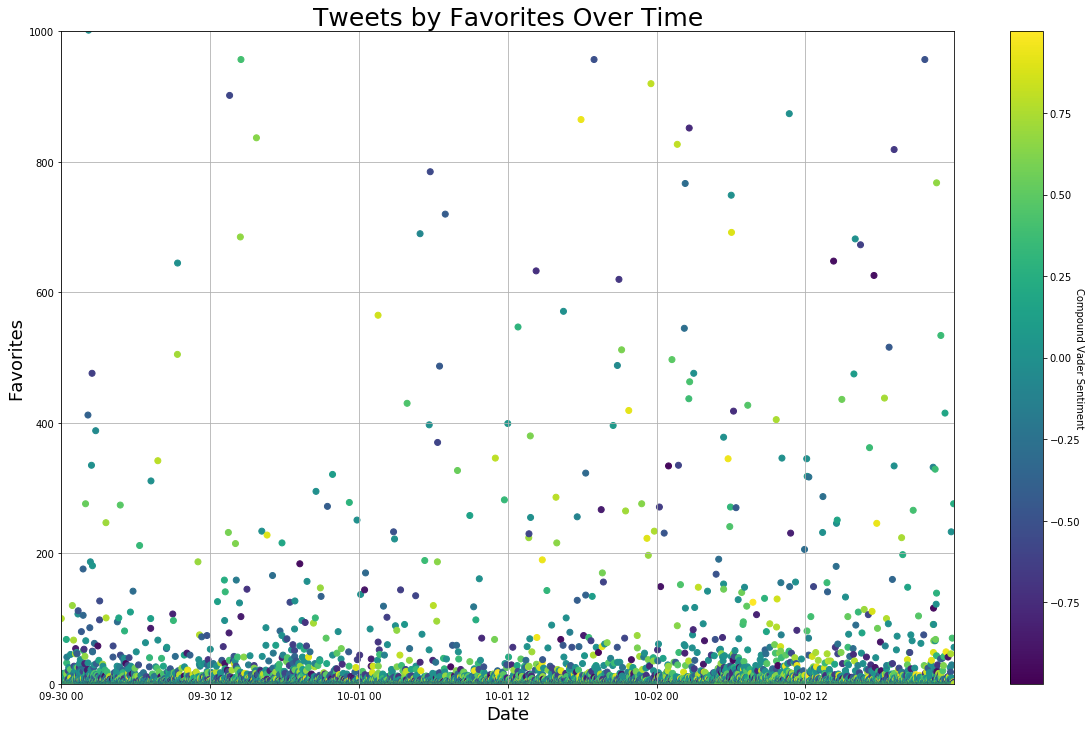

In [52]:
plt.figure(figsize=(20, 12))
plt.subplot(111)
arr1 = plt.scatter(df.created_at, df.favorite_count, c=df.vader_compound)
plt.xlim(['2020-09-30 00:00:00+00:00','2020-10-02 23:59:54+0000'])
plt.ylim([0, 1000])
plt.title('Tweets by Favorites Over Time', fontsize = 25)
plt.ylabel('Favorites', fontsize = 18)
plt.xlabel('Date', fontsize = 18)
plt.yscale('linear')
bar = plt.colorbar()
bar.set_label('Compound Vader Sentiment', rotation=270)
plt.grid(True)


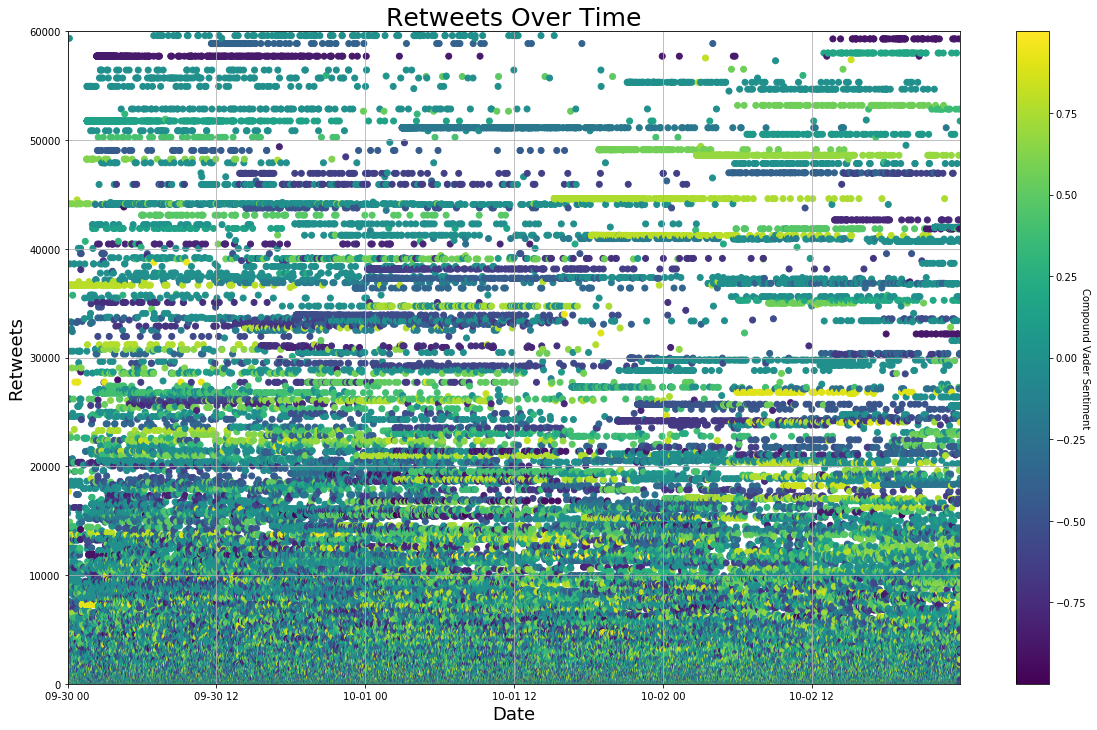

In [68]:
plt.figure(figsize=(20, 12))
plt.subplot(111)
arr1 = plt.scatter(df.created_at, df.retweet_count, c=df.vader_compound)
plt.xlim(['2020-09-30 00:00:00+00:00','2020-10-02 23:59:54+0000'])
plt.ylim([0, 60000])
plt.title('Retweets Over Time', fontsize = 25)
plt.ylabel('Retweets', fontsize = 18)
plt.xlabel('Date', fontsize = 18)
plt.yscale('linear')
bar = plt.colorbar()
bar.set_label('Compound Vader Sentiment', rotation=270)
plt.grid(True)


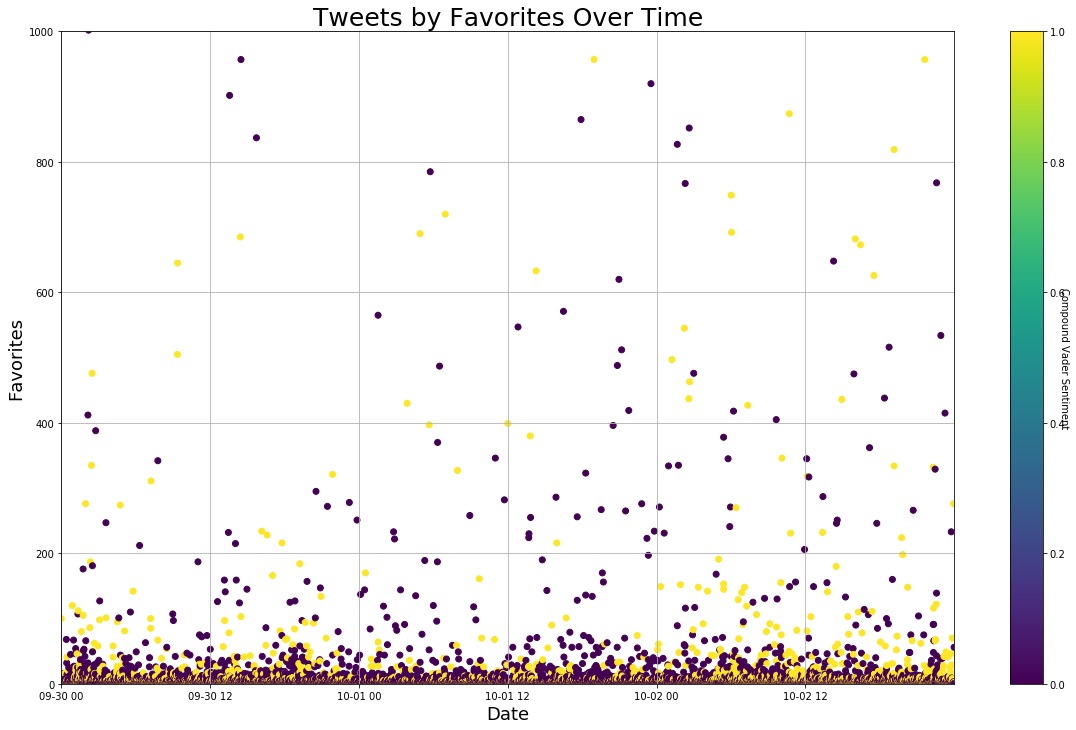

In [55]:
plt.figure(figsize=(20, 12))
plt.subplot(111)
arr1 = plt.scatter(df.created_at, df.favorite_count, c=df.trump)
plt.xlim(['2020-09-30 00:00:00+00:00','2020-10-02 23:59:54+0000'])
plt.ylim([0, 1000])
plt.title('Tweets by Favorites Over Time', fontsize = 25)
plt.ylabel('Favorites', fontsize = 18)
plt.xlabel('Date', fontsize = 18)
plt.yscale('linear')
bar.set_label('Compound Vader Sentiment', rotation=270)
plt.grid(True)


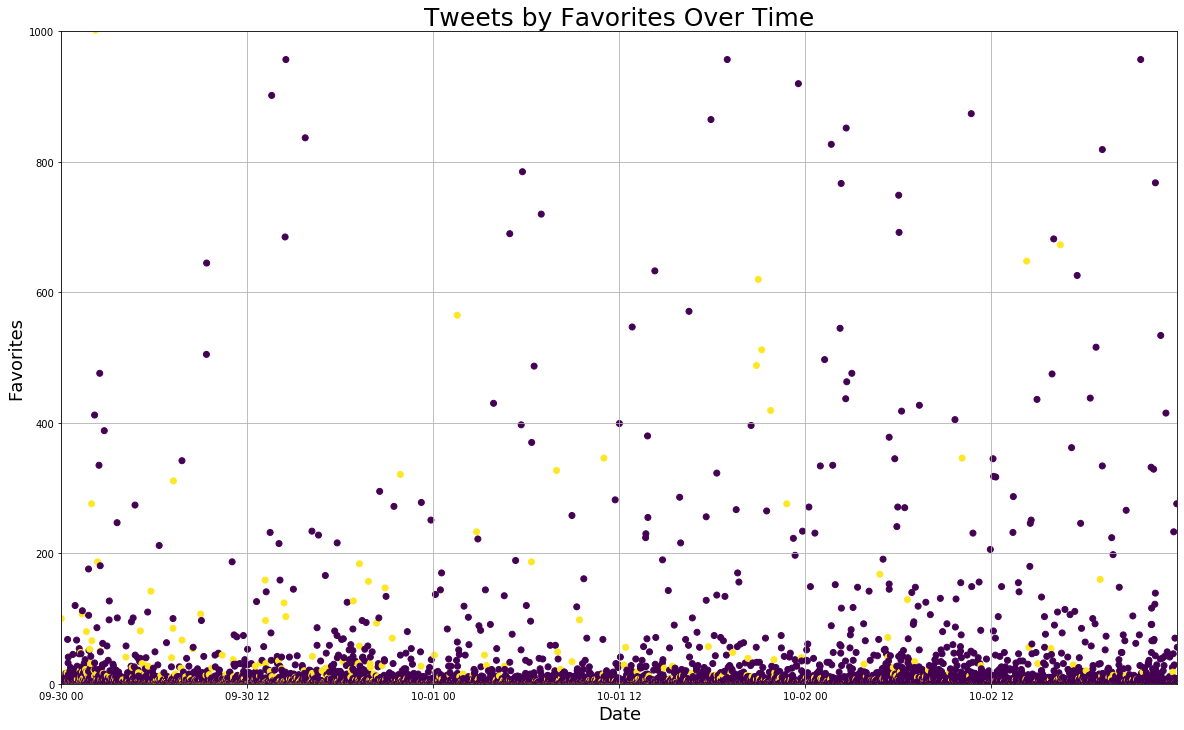

In [56]:
plt.figure(figsize=(20, 12))
plt.subplot(111)
arr1 = plt.scatter(df.created_at, df.favorite_count, c=df.biden)
plt.xlim(['2020-09-30 00:00:00+00:00','2020-10-02 23:59:54+0000'])
plt.ylim([0, 1000])
plt.title('Tweets by Favorites Over Time', fontsize = 25)
plt.ylabel('Favorites', fontsize = 18)
plt.xlabel('Date', fontsize = 18)
plt.yscale('linear')
bar.set_label('Compound Vader Sentiment', rotation=270)
plt.grid(True)


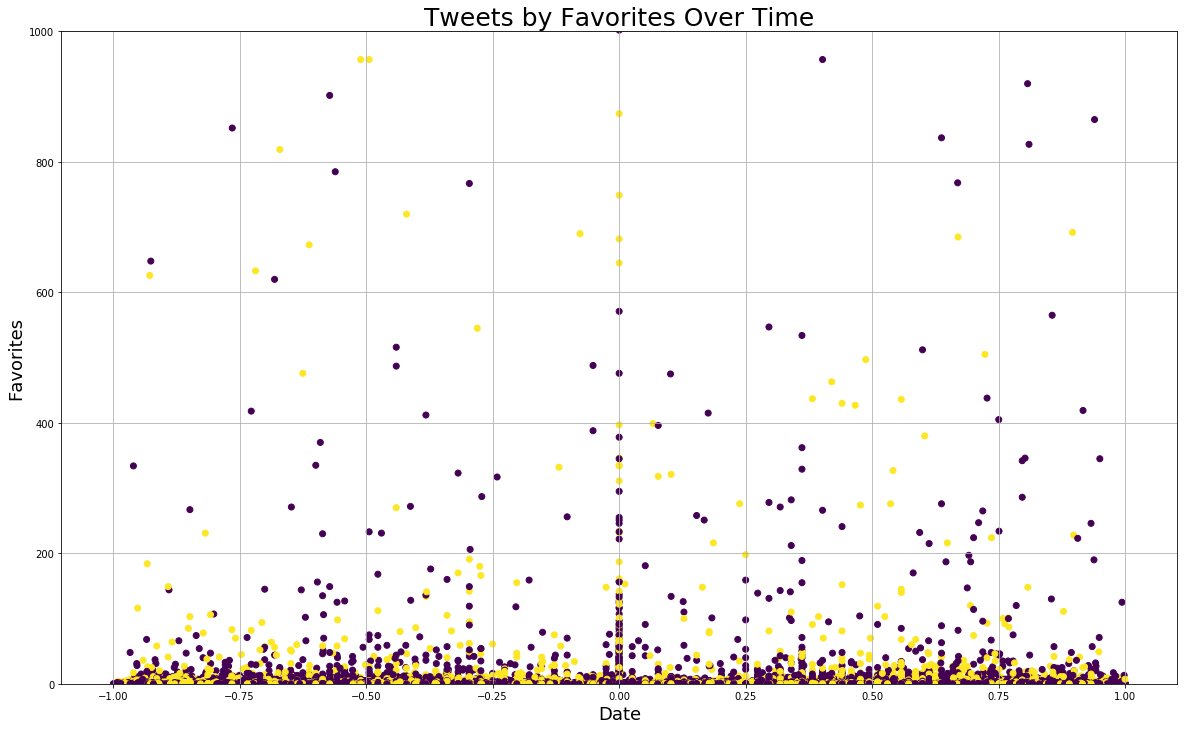

In [57]:
plt.figure(figsize=(20, 12))
plt.subplot(111)
arr1 = plt.scatter(df.vader_compound, df.favorite_count, c=df.trump)
#plt.xlim(['2020-09-30 00:00:00+00:00','2020-10-02 23:59:54+0000'])
plt.ylim([0, 1000])
plt.title('Tweets by Favorites Over Time', fontsize = 25)
plt.ylabel('Favorites', fontsize = 18)
plt.xlabel('Date', fontsize = 18)
plt.yscale('linear')
bar.set_label('Compound Vader Sentiment', rotation=270)
plt.grid(True)

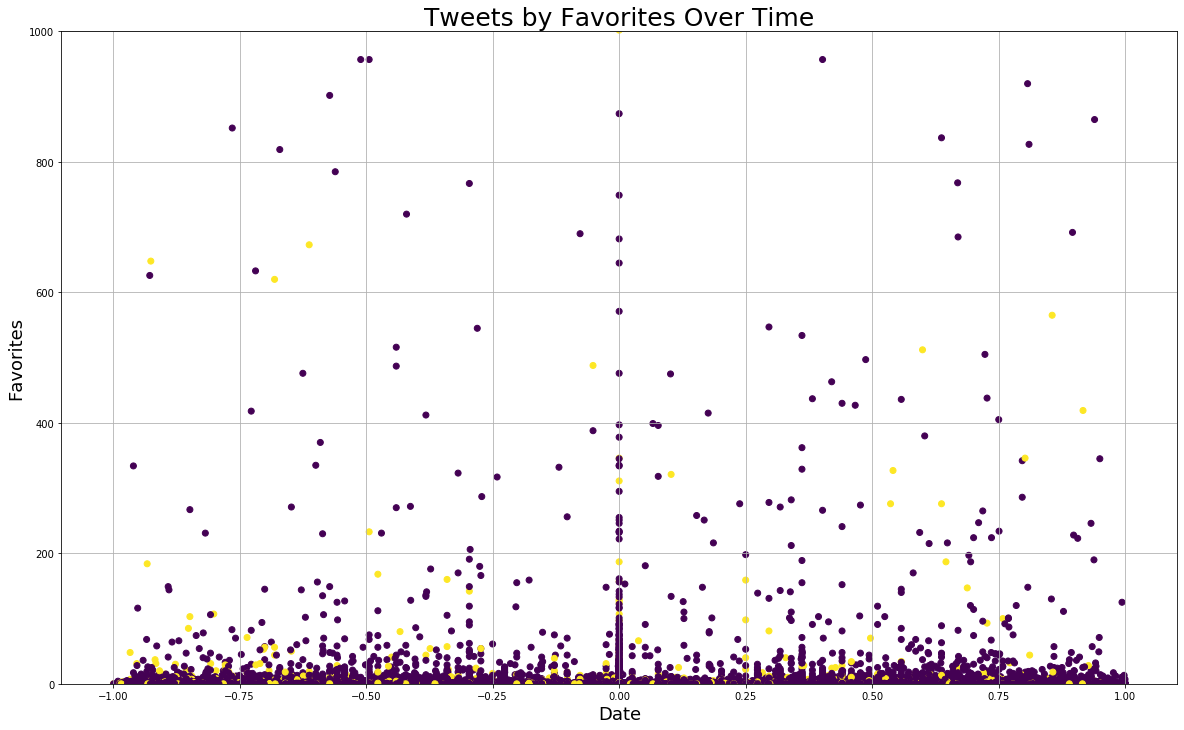

In [61]:
plt.figure(figsize=(20, 12))
plt.subplot(111)
arr1 = plt.scatter(df.vader_compound, df.favorite_count, c=df.biden)
#plt.xlim(['2020-09-30 00:00:00+00:00','2020-10-02 23:59:54+0000'])
plt.ylim([0, 1000])
plt.title('Tweets by Favorites Over Time', fontsize = 25)
plt.ylabel('Favorites', fontsize = 18)
plt.xlabel('Date', fontsize = 18)
plt.yscale('linear')
bar.set_label('Compound Vader Sentiment', rotation=270)
plt.grid(True)

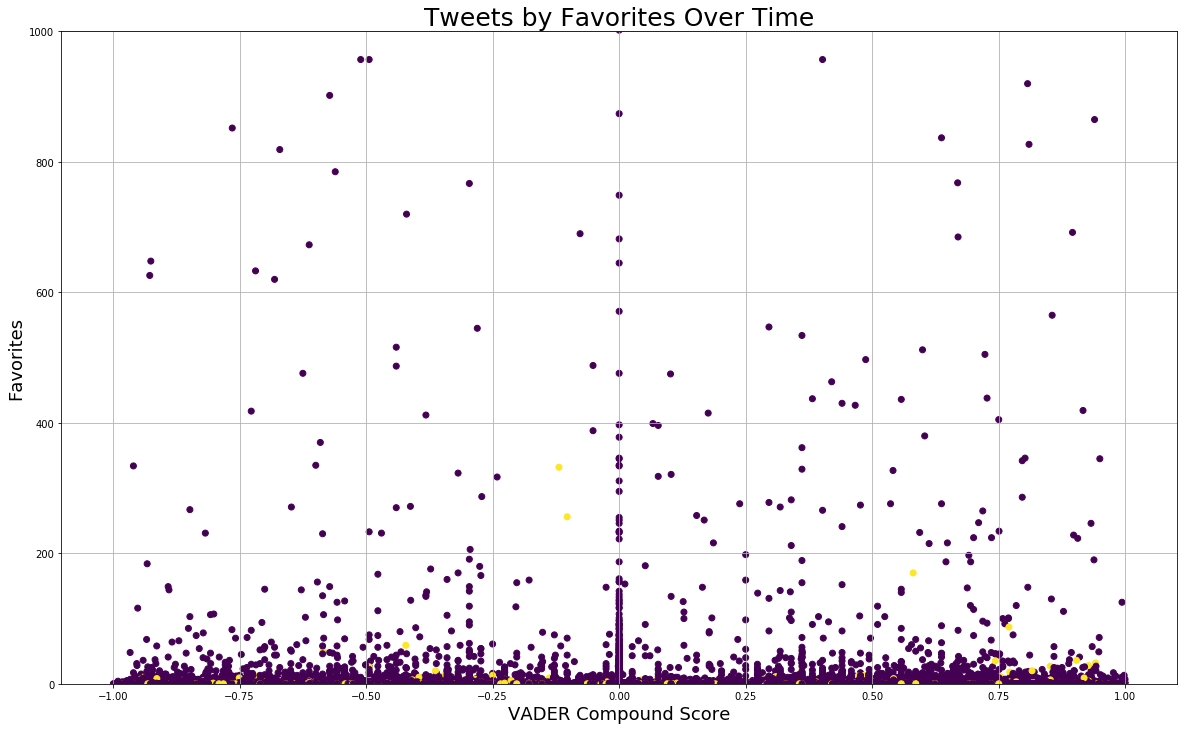

In [63]:
plt.figure(figsize=(20, 12))
plt.subplot(111)
arr1 = plt.scatter(df.vader_compound, df.favorite_count, c=df['trailingnumbers'])
#plt.xlim(['2020-09-30 00:00:00+00:00','2020-10-02 23:59:54+0000'])
plt.ylim([0, 1000])
plt.title('Tweets by Favorites Over Time', fontsize = 25)
plt.ylabel('Favorites', fontsize = 18)
plt.xlabel('VADER Compound Score', fontsize = 18)
plt.yscale('linear')
bar.set_label('Compound Vader Sentiment', rotation=270)
plt.grid(True)